<a href="https://colab.research.google.com/github/Dasha-nz/nz/blob/main/%D0%9B%D0%B0%D0%B1%D0%B02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! wget -q https://www.dropbox.com/s/ug0b4pvuynwj4pe/news_science.zip && unzip news_science.zip

Archive:  news_science.zip
   creating: news_science/news1_txt/
  inflating: news_science/news1_txt/news1_1.txt  
  inflating: news_science/news1_txt/news1_10.txt  
  inflating: news_science/news1_txt/news1_11.txt  
  inflating: news_science/news1_txt/news1_12.txt  
  inflating: news_science/news1_txt/news1_13.txt  
  inflating: news_science/news1_txt/news1_14.txt  
  inflating: news_science/news1_txt/news1_15.txt  
  inflating: news_science/news1_txt/news1_16.txt  
  inflating: news_science/news1_txt/news1_17.txt  
  inflating: news_science/news1_txt/news1_18.txt  
  inflating: news_science/news1_txt/news1_19.txt  
  inflating: news_science/news1_txt/news1_2.txt  
  inflating: news_science/news1_txt/news1_20.txt  
  inflating: news_science/news1_txt/news1_21.txt  
  inflating: news_science/news1_txt/news1_22.txt  
  inflating: news_science/news1_txt/news1_23.txt  
  inflating: news_science/news1_txt/news1_24.txt  
  inflating: news_science/news1_txt/news1_25.txt  
  inflating: news_sc

In [2]:
import glob
import pandas as pd
from tqdm import tqdm


data = []
for path in glob.glob('./news_science/*'):
  texts = []
  for filename in tqdm(glob.glob(path + '/*.txt')):
    texts.append(open(filename, 'r').read().strip())

  data.append(pd.DataFrame({'text': texts}))
  data[-1]['genre'] = path.split('/')[-1][:3]

data = pd.concat(data)

100%|██████████| 79/79 [00:00<00:00, 3995.92it/s]


In [3]:
data.sample(3)

,text,genre
36,"﻿УДК 624.04 \nВ.В. Козырева, А.А. Волков \nФ...",sci
3,ПРОБЛЕМА ИНТЕГРАЦИИ ЛОКАЛЬНЫХ АВТОМАТИЗИРОВАНН...,sci
45,"УДК 004.896 \nВ.В. ВИШНЕВСКИЙ*, В.Г. КАЛМЫКОВ...",sci


In [4]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


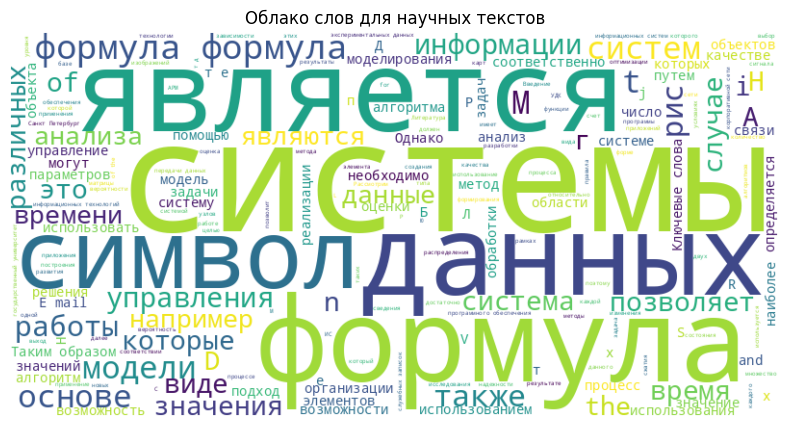

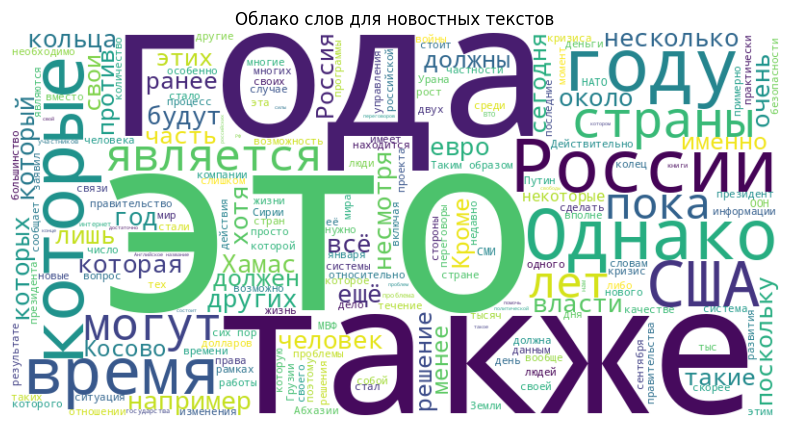

In [35]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Загрузка стоп-слов из NLTK
nltk.download('stopwords')
stop_words = set(stopwords.words('russian'))


# Пример использования
sci_texts = ' '.join(data[data['genre'] == 'sci']['text'])  # Тексты для научного жанра
new_texts = ' '.join(data[data['genre'] == 'new']['text'])  # Тексты для новостного жанра


# Создание облака слов для научных текстов
wordcloud_sci = WordCloud(stopwords=stop_words,    width=800, height=400,    background_color='white').generate(sci_texts)
# Отображение облака слов для научных текстов
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_sci, interpolation='bilinear')
plt.axis("off")
plt.title('Облако слов для научных текстов')
plt.show()
# Создание облака слов для новостных текстов
wordcloud_new = WordCloud(stopwords=stop_words, width=800,    height=400, background_color='white').generate(new_texts)
# Отображение облака слов для новостных текстов
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_new, interpolation='bilinear')
plt.axis("off")
plt.title('Облако слов для новостных текстов')
plt.show()

In [50]:
import string
import nltk
from nltk.tokenize import word_tokenize

# Инициализировать токенизатор
nltk.download('punkt')  # Скачиваем необходимые ресурсы для токенизации
tokenizer = word_tokenize

# 1. Токенизировать тексты выбранным токенизатором, приведя их к нижнему регистру
data['text_tokenized'] = data.text.map(lambda row: [token.lower() for token in tokenizer(row)])

# 2. Удалить из списка токенов те, которые представлены пунктуацией и числами

def is_symbol(tok):
    """ Функция определения, состоит ли токен только из знаков пунктуации """
    return tok in string.punctuation or tok.isdigit()

def clean_tokens(tokens):
    """ Функция возвращает из списка токенов только слова на русском языке """
    return [tok for tok in tokens if not is_symbol(tok)]

data['text_tokenized'] = data.text_tokenized.map(clean_tokens)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [55]:
import nltk


def create_bigram(tokens):
    bigrams = nltk.bigrams(tokens)
    return list(bigrams)

# Пример для новостных текстов
tokens_news = [token for row in data[data.genre == 'new'].text_tokenized.values for token in row]
bigrams_list = create_bigram(tokens_news)
bigrams_news = [" ".join(bigram) for bigram in list(bigrams_list)]

# Тестирование
assert bigrams_news[:3] == ['в одном', 'одном из', 'из районов']
print("Тест пройден")

Тест пройден


In [57]:
from collections import Counter, OrderedDict

def sort_by_frequency(list_of_ngrams, reverse=True):
    """
    Функция сортировки n-грамм по частотности вхождения в список Возвращает упорядоченный словарь (OrderedDict)
    """
    # Подсчет частоты вхождения n-грамм
    frequency = Counter(list_of_ngrams)

    # Сортировка n-грамм по частоте
    sorted_frequency = frequency.most_common() if reverse else frequency.most_common()[::-1]

    # Преобразование в упорядоченный словарь
    data_sorted_by_freq = OrderedDict(sorted_frequency)

    return data_sorted_by_freq

# Пример использования
bigrams_news_sorted = sort_by_frequency(bigrams_news)

# Тестирование
result = bigrams_news_sorted
assert type(bigrams_news_sorted) == OrderedDict, 'Словарь должен быть упорядоченным'
assert bigrams_news_sorted.get('национальной безопасности') == 4, 'Проверьте счетчик биграмм'
top_20_bigrams = list(result.items())[:20]
for bigram, count in top_20_bigrams:
    print(f"{bigram}: {count}")
print('Тесты пройдены')


в году: 65
том что: 59
» в: 50
то что: 47
о том: 45
а также: 43
в россии: 37
в том: 34
несмотря на: 34
и в: 33
в течение: 30
и не: 29
не только: 28
» и: 28
что в: 27
в этом: 26
при этом: 25
таким образом: 24
на то: 23
в то: 23
Тесты пройдены
